In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('sample data\\homeprices.csv')
df

,area,price
0,2000,55000
1,3000,56500
2,3200,61000
3,3800,68000
4,4000,725000


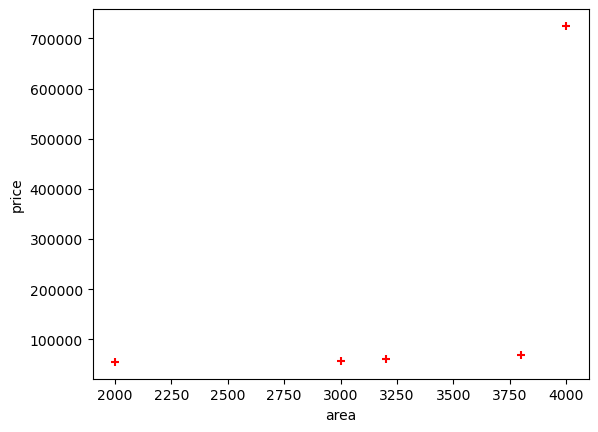

In [3]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [5]:
reg.predict([[3300]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215015.32258065])

In [6]:
reg.coef_

array([219.15322581])

In [7]:
reg.intercept_

-508190.3225806451

In [8]:
219.15322581*3300+-508190.3225806451


215015.32259235496

In [9]:
p = pd.read_csv('sample data\\singlepredict.csv')

In [10]:
d = reg.predict(p)
d

array([-289037.09677419, -179460.48387097,   -4137.90322581,
        267612.09677419,  394720.96774194,  521829.83870968,
       1376527.41935484, 1047797.58064516, 1376527.41935484])

In [11]:
p['price'] = d

In [12]:
p

,area,price
0,1000,-2.890371e+05
1,1500,-1.794605e+05
2,2300,-4.137903e+03
3,3540,2.676121e+05
4,4120,3.947210e+05
5,4700,5.218298e+05
6,8600,1.376527e+06
7,7100,1.047798e+06
8,8600,1.376527e+06


# 1st approach to assign model into variable by pickle method

In [14]:
import pickle

In [17]:
with open('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [20]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [21]:
mp.predict([[3300]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215015.32258065])

# 2nd approach to assign model into variable by joblib

In [34]:
import joblib

In [35]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [36]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [37]:
mj = joblib.load('model_joblib')

In [40]:
mj.predict([[3300]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([215015.32258065])